In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# Path to the folder containing your .npz files
folder_path = "Noise Sampling (Improved - Filter attached)"

# List all .npz files in the folder
npz_files = [f for f in os.listdir(folder_path) if f.endswith(".npz")]

# Store all data from .npz files
all_data = []

# Loop through each file and extract data
for file in npz_files:
    file_path = os.path.join(folder_path, file)
    data = np.load(file_path, allow_pickle=True)  # Use allow_pickle=True in case of nested objects
    
    for key in data.files:  
        array = data[key]

        if isinstance(array, np.ndarray):
            # Ensure 1D array
            all_data.extend(array.ravel())  # ravel() flattens multi-dimensional arrays

# Convert to a NumPy array
all_data = np.array(all_data, dtype=float)  # Explicitly set dtype to avoid object arrays


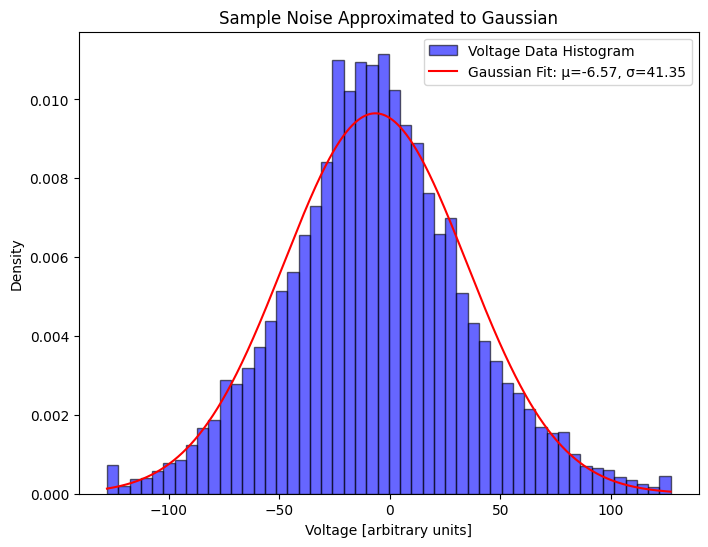

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(all_data, bins=50, density=True, alpha=0.6, color='b', label="Voltage Data Histogram", edgecolor='black')

# Fit Gaussian (Normal) Distribution
mu, sigma = norm.fit(all_data)

# Plot Gaussian Fit
x = np.linspace(min(all_data), max(all_data), 1000)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', label=f"Gaussian Fit: μ={mu:.2f}, σ={sigma:.2f}")

plt.xlabel("Voltage [arbitrary units]")
plt.ylabel("Density")
plt.title("Sample Noise Approximated to Gaussian")
plt.legend()
save_path = folder_path  # Change path as needed
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High resolution (300 DPI)
plt.show()